## Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house. Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

### Business Goal :
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Determine the optimal value of lambda for ridge and lasso regression.
This model will then be used by the management to understand how exactly the prices vary with the variables
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
The model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#creating a individual variable to store the target feature
y = train_data[['SalePrice']]

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Splitting into numerical and categorical variables

In [7]:
n_val = train_data.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
print(n_val.columns)
l=[]
for i in n_val:
  l.append(i)
print("Total no of numerical variables:",len(l))

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Total no of numerical variables: 37


In [8]:
c_val = train_data.select_dtypes(include=['object']).copy()
c_val['MSSubClass'] = train_data['MSSubClass']
print(c_val.columns)
l=[]
for i in c_val:
  l.append(i)
print("Total no of categorical variables:",len(l))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')
Total no of categorical variables: 44


#### Univariate Analysis: For numerical variables

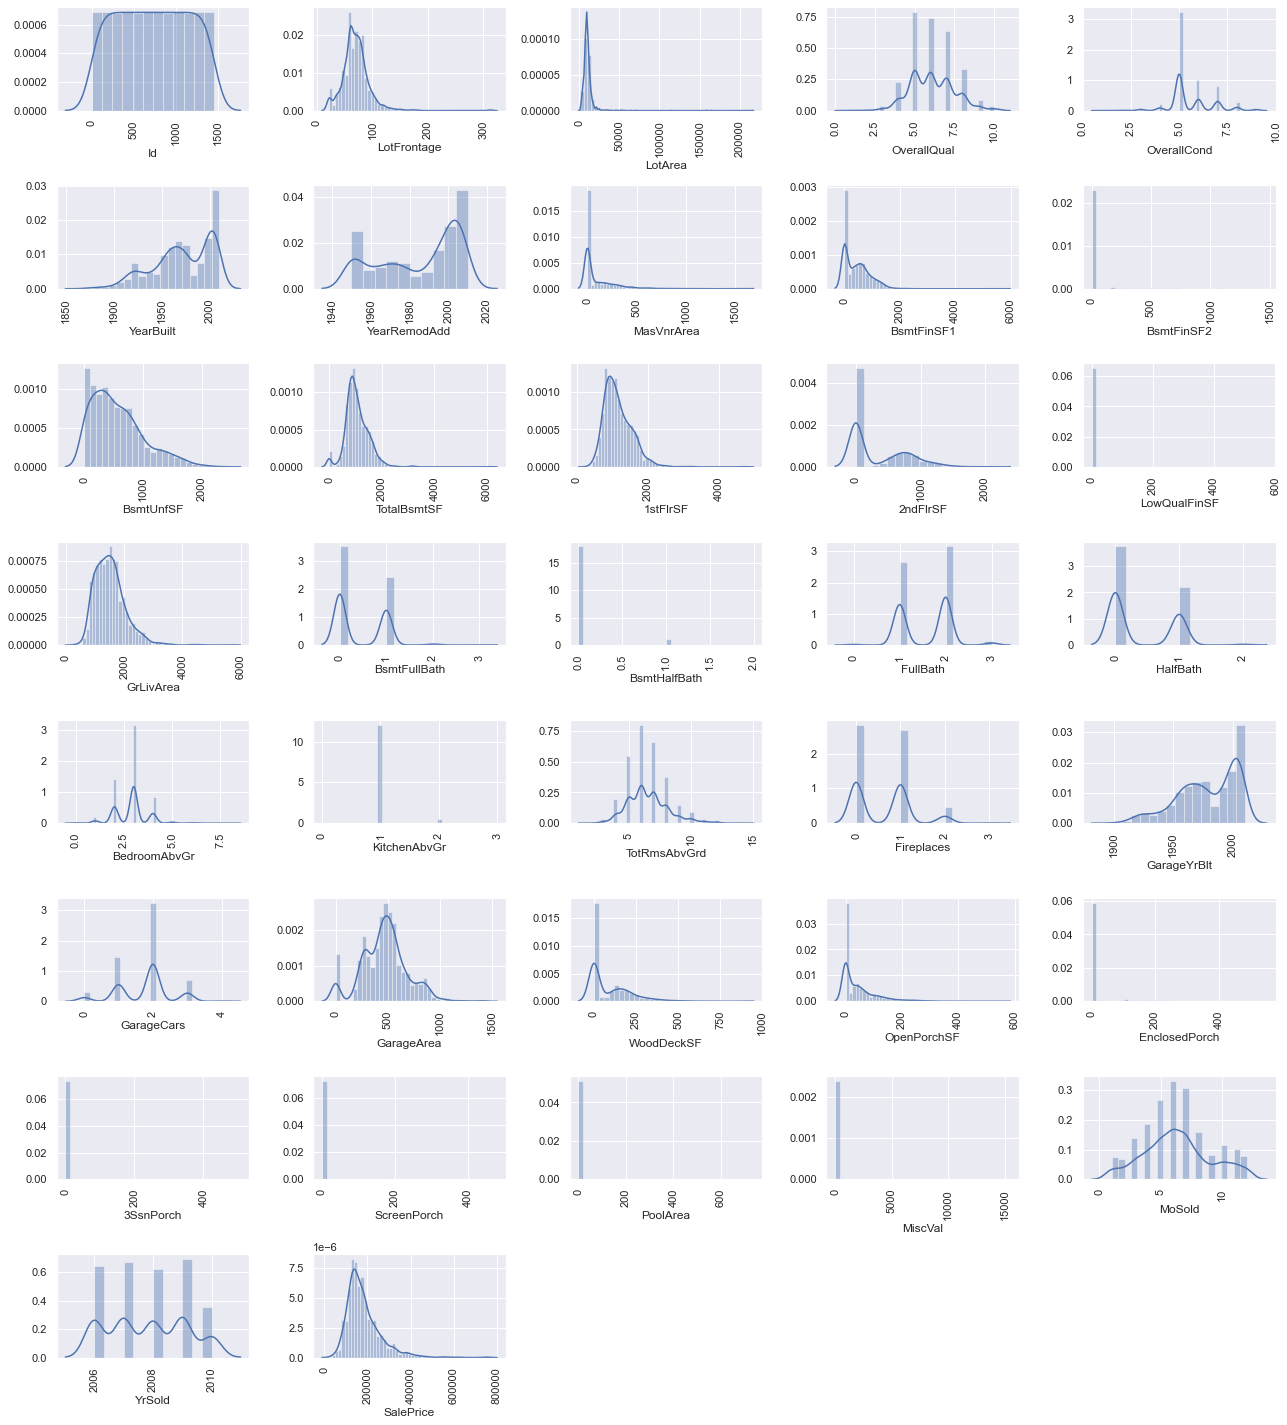

In [9]:
fig = plt.figure(figsize=(18,20))
for index,col in enumerate(n_val):
    plt.subplot(8,5,index+1)
    sns.distplot(n_val.loc[:,col].dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

###### From the given plots we can tell that certain numerical variables have only one kind of value:

* BsmtFinSF2
* EnclosedPorch
* LowQualFinSF
* 3SsnPorch
* ScreenPorch
* PoolArea
* MiscVal

Most of the values present in these variables are 0, thus these features can be cleared during the data preprocessing step.

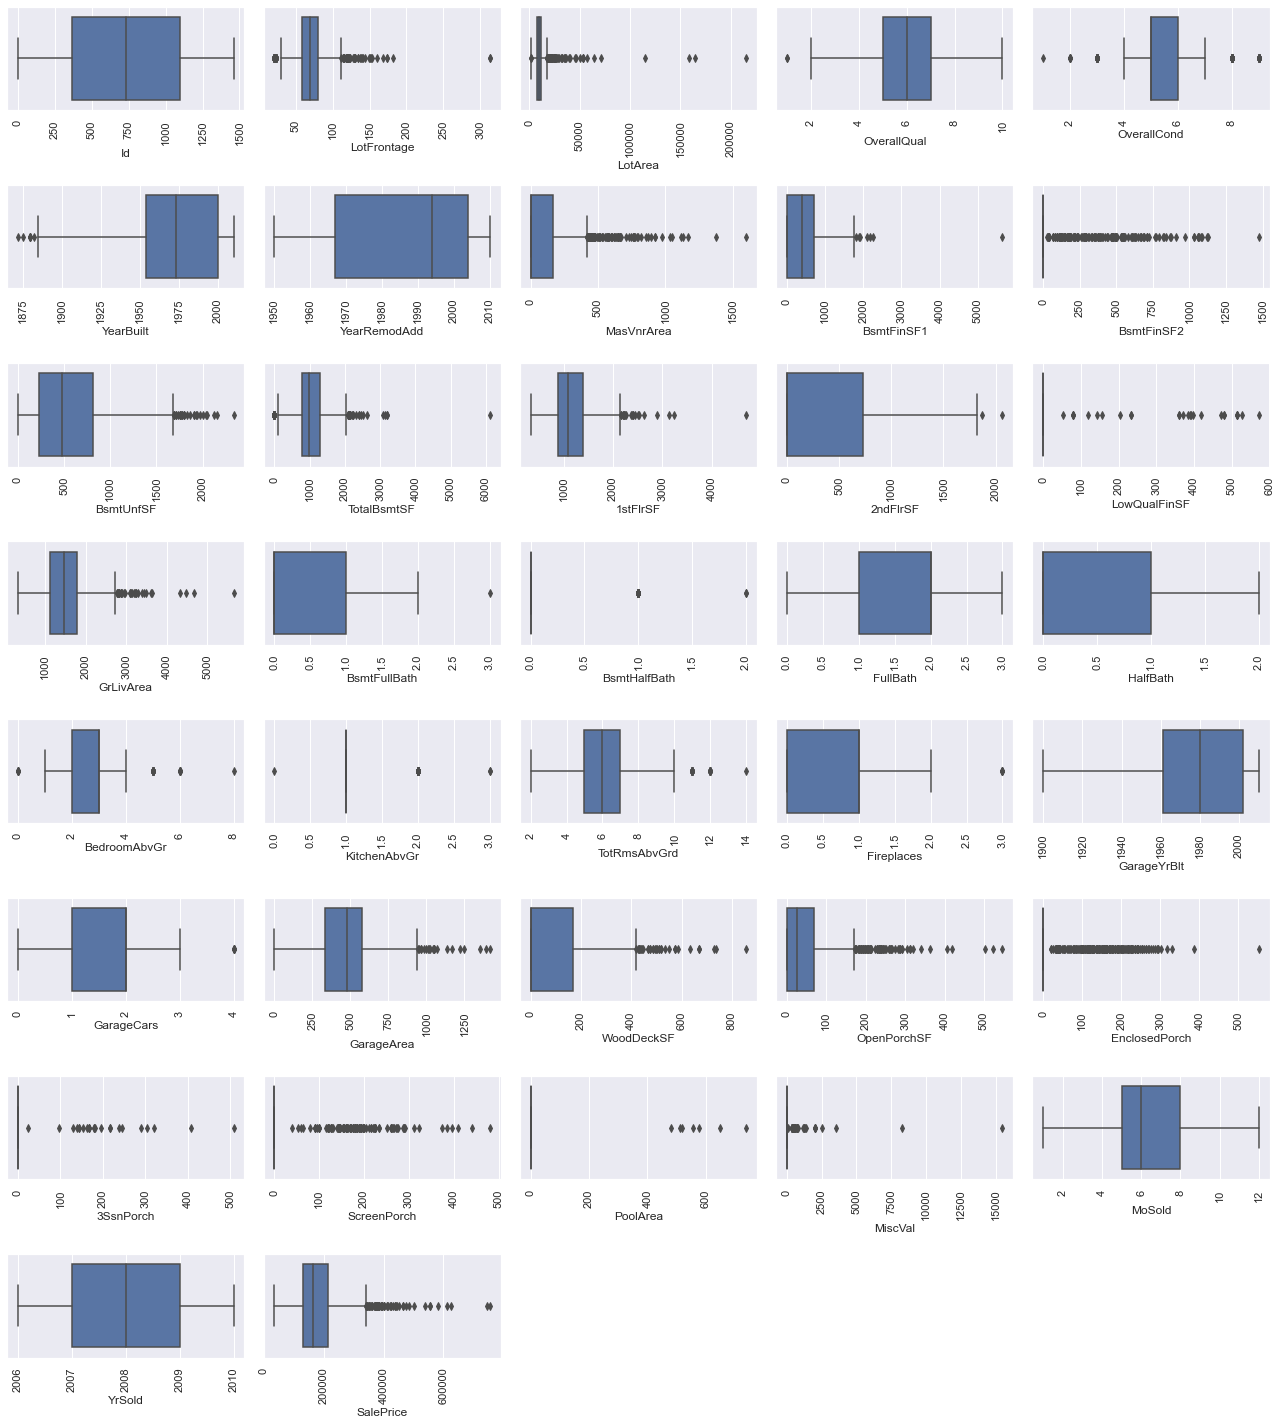

In [10]:
fig = plt.figure(figsize=(18,20))
for index in range(len(n_val.columns)):
    plt.subplot(8,5,index+1)
    sns.boxplot(x=n_val.iloc[:,index], data=n_val.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

From above boxplots , we infer that certain numerical features have extreme outliers, thus should remove these outliers.

In [11]:
train_data = train_data.drop(train_data[train_data['LotFrontage'] > 200].index)
train_data = train_data.drop(train_data[train_data['LotArea'] > 100000].index)
train_data = train_data.drop(train_data[train_data['BsmtFinSF1'] > 4000].index)
train_data = train_data.drop(train_data[train_data['TotalBsmtSF'] > 5000].index)
train_data = train_data.drop(train_data[train_data['GrLivArea'] > 4000].index)
train_data = train_data.drop(train_data[train_data['Fireplaces'] > 2.5].index)

##### Univariate Analysis for Categorical Variables

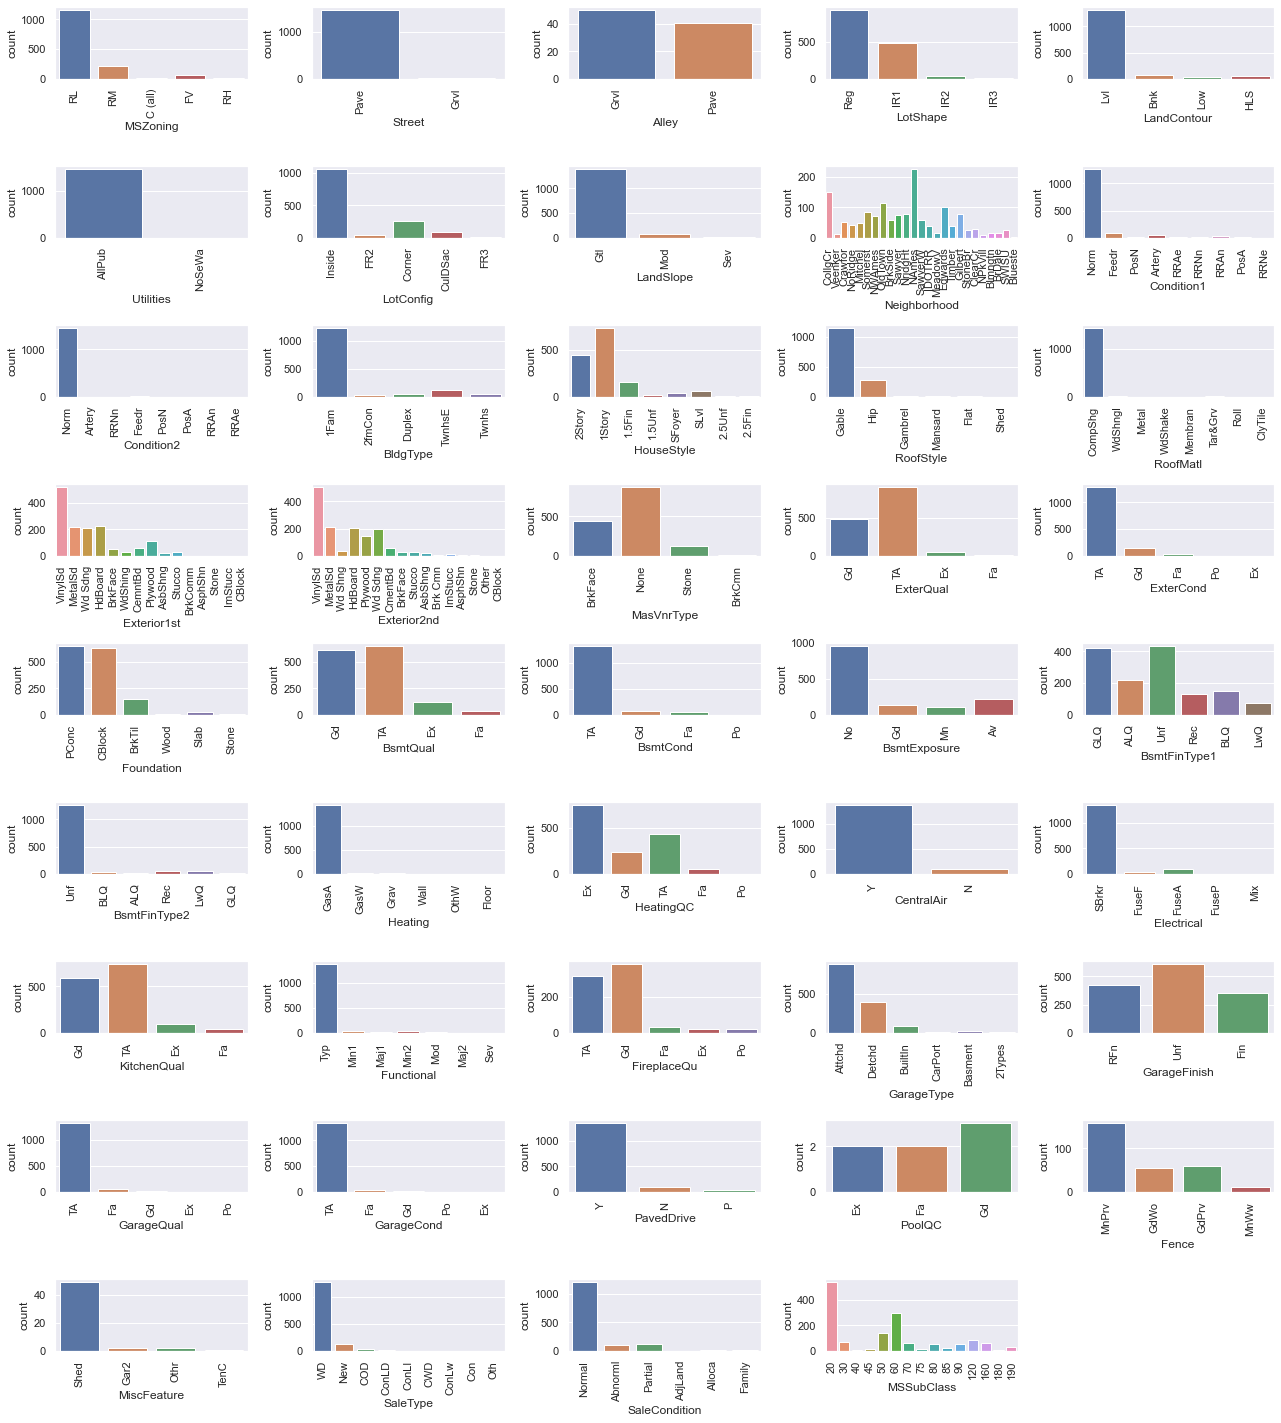

In [12]:
fig = plt.figure(figsize=(18,20))
for index in range(len(c_val.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=c_val.iloc[:,index], data=c_val.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

###### From the given plots we can tell that certain categorical features have only one kind of value:

* Street
* Utilities
* Condition2
* Heating
* RoofMatl
* Functional

These consist of only one value hence we can remove these features in the data preprocessing step

##### Bivariate Analysis:

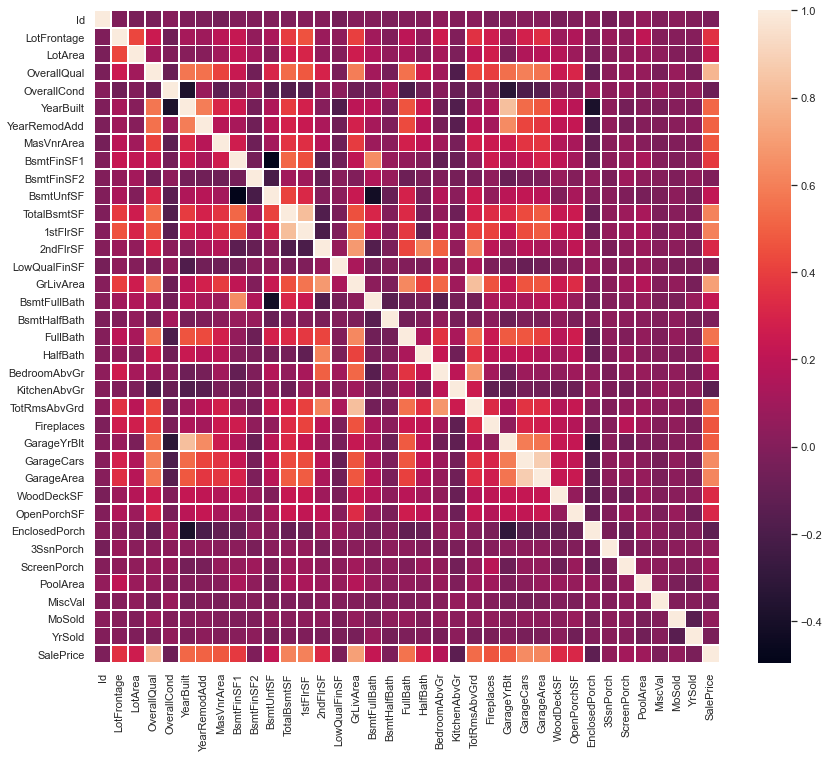

In [13]:
plt.figure(figsize=(14,12))
correlation = n_val.corr()
sns.heatmap(correlation, linewidth=0.5)

###### From the given correlation matrix we can infer the highly correlated features:

* GarageYrBlt and YearBuilt
* TotRmsAbvGrd and GrLivArea
* 1stFlrSF and TotalBsmtSF
* GarageArea and GarageCars

###### We need to find the numerical features which have high correlation to the target variable 'SalePrice'

In [14]:
nfeatures_corr = n_val.corr()['SalePrice'][:-1]
high_fealist = nfeatures_corr[abs(nfeatures_corr)> 0.5].sort_values(ascending=False)
print("HIGHLY CORRELATED FEATURES:\n")
print(high_fealist)

HIGHLY CORRELATED FEATURES:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


###### Finding the relation between the numerical features and the target variables:

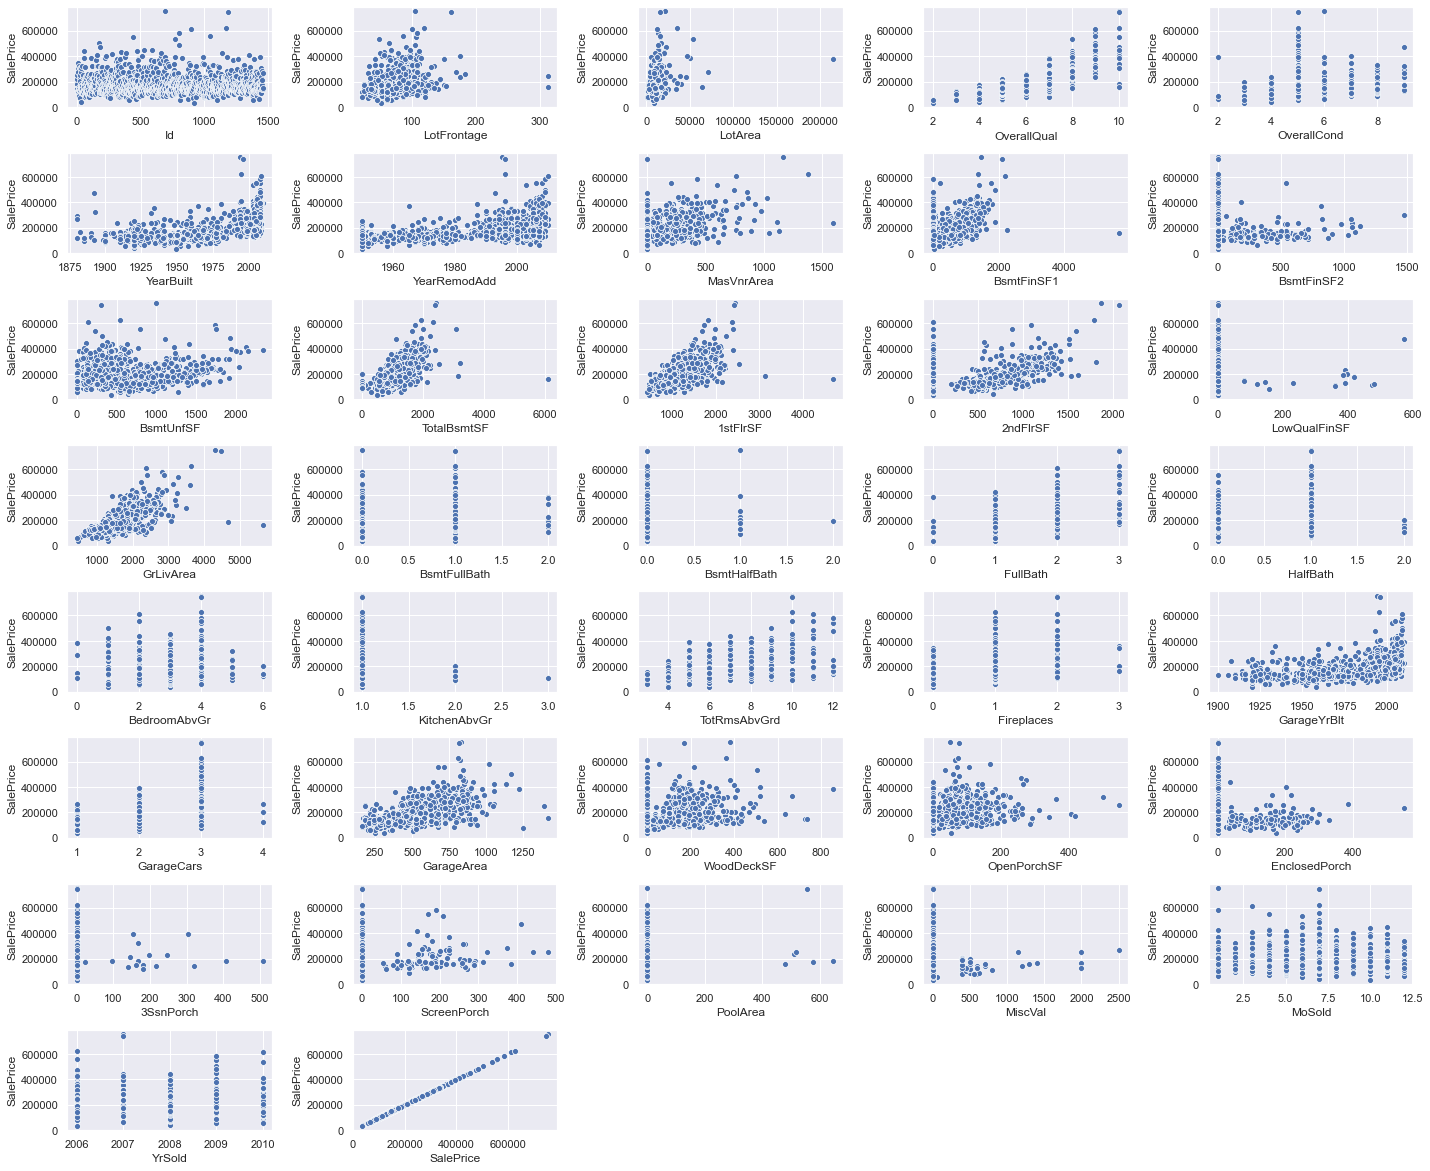

In [15]:
fig = plt.figure(figsize=(20,20))
for index in range(len(n_val.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=n_val.iloc[:,index], y='SalePrice', data=n_val.dropna())
fig.tight_layout(pad=1.0)

Observations from the above plot:-

* New properties are costlier than older properties.
* GRLiving Area has a direct corelation with the proce of the property.
* Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.
* Month sold has no effect on the price.

### Data Pre-processing:

In [16]:
# Dropping ID Columns from dataset since it is useless in the prediction usecase
train_data.drop('Id', axis=1, inplace=True)

We will first drop the highly correlated features which we already found out

In [17]:
train_data.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

#### Checking the dataset for the amount of nulls present

In [18]:
round(train_data.isnull().sum()/len(train_data.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.48
LotFrontage     0.18
GarageCond      0.06
GarageType      0.06
GarageFinish    0.06
GarageQual      0.06
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Neighborhood    0.00
dtype: float64

We can infer that the following features consists of lots of missing values and hence can be removed safely:

* PoolQC
* MiscFeature
* Alley
* Fence
* FireplaceQu

In [19]:
train_data.drop(['PoolQC','MiscFeature','Alley', 'Fence','FireplaceQu'], axis=1, inplace=True)

In [20]:
#find the total no of missing values
train_data.isnull().sum().sum()

783

In [21]:
#finding the missing values in features
missval = train_data.isnull().sum()
missval = missval[missval>0]
missval.sort_values(ascending=False)

LotFrontage     255
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [22]:
#view of the total number of missing values and the percentage of missing values in each column
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
LotFrontage,255,0.176227
GarageCond,81,0.055978
GarageType,81,0.055978
GarageFinish,81,0.055978
GarageQual,81,0.055978
BsmtFinType2,38,0.026261
BsmtExposure,38,0.026261
BsmtCond,37,0.025570
BsmtQual,37,0.025570
BsmtFinType1,37,0.025570


#### Imputing the missing values:

###### Ordinal Features: Replacing the missing values with 'NA'

In [23]:
#we are filling
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType']:
    train_data[col] = train_data[col].fillna('NA')

###### Nominal Features: Replacing the missing value of the categorical features with the mode

In [24]:
cols = ["MasVnrArea","MasVnrType", "Exterior1st", "Exterior2nd", "SaleType", "Electrical"]
train_data[cols] = train_data.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))

###### Numerical Feature: Replacing the missing values with the median

In [25]:
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [26]:
#checking the null values in dataset after imputation
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
SalePrice,0,0.0
ExterQual,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
...,...,...
HalfBath,0,0.0
BedroomAbvGr,0,0.0
KitchenAbvGr,0,0.0
KitchenQual,0,0.0


#### Removing Constant features:
We will be dropping features which consists of large number of one kind of value's or 0, from following

* Numerical Variables
* Categorical Variables


In [27]:
#for numerical variables
nval_col = train_data.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_nvals = []
for i in nval_col:
    counts = train_data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train_data) * 100 > 95:
        overfit_nvals.append(i)
overfit_nvals = list(overfit_nvals)
train_data = train_data.drop(overfit_nvals, axis=1)

In [28]:
#printing constant features
print("Dropped the following Constant numerical features:\n",overfit_nvals) 

Dropped the following Constant numerical features:
 ['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


In [29]:
#for categorical variables
cval_col = train_data.select_dtypes(include=['object']).columns
overfit_cvals = []
for i in cval_col:
    counts = train_data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train_data) * 100 > 95:
        overfit_cvals.append(i)
overfit_cvals = list(overfit_cvals)
train_data = train_data.drop(overfit_cvals, axis=1)

In [30]:
#printing constant features
print("Dropped the following Constant categorical features:\n",overfit_cvals)

Dropped the following Constant categorical features:
 ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


In [31]:
train_data.shape

(1447, 61)

### Feature Engineering

##### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number

In [32]:
train_data['YearBuilt_Old'] = train_data.YearBuilt.max()-train_data.YearBuilt
train_data['YearRemodAdd_Old'] = train_data.YearRemodAdd.max()-train_data.YearRemodAdd
train_data['YrSold_Old'] = train_data.YrSold.max()-train_data.YrSold
train_data[['YearBuilt','YearRemodAdd','YrSold','YearBuilt_Old','YearRemodAdd_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,YrSold,YearBuilt_Old,YearRemodAdd_Old,YrSold_Old
1069,1949,2003,2007,61,7,3
616,2002,2003,2006,8,7,4
1286,1963,1963,2010,47,47,0
891,1978,1978,2009,32,32,1
502,1965,1965,2007,45,45,3
1421,1977,1977,2010,33,33,0
1256,1994,1994,2008,16,16,2
1110,1995,1996,2008,15,14,2
1059,1932,1950,2007,78,60,3
112,2007,2007,2007,3,3,3


###### Lets drop the actual Year columns

In [33]:
train_data = train_data.drop(['YearBuilt','YearRemodAdd','YrSold'],axis='columns')

In [34]:
train_data[list(train_data.dtypes[train_data.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


Lets check for the below categorical columns, which is seen having some kind of order and hence we can say these are ordinal in nature

In [35]:
train_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [36]:
train_data['LandSlope'] = train_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
train_data['ExterQual'] = train_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_data['BsmtQual'] = train_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['BsmtCond'] = train_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['BsmtExposure'] = train_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
train_data['BsmtFinType1'] = train_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_data['BsmtFinType2'] = train_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_data['HeatingQC'] = train_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_data['CentralAir'] = train_data.CentralAir.map({'N':0,'Y':1})
train_data['KitchenQual'] = train_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_data['GarageFinish'] = train_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
train_data['GarageQual'] = train_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['GarageCond'] = train_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['ExterCond'] = train_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_data['LotShape'] = train_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [37]:
# lets look into converted column
train_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [38]:
## Creating and joining dummy column with the actual dataset
dummy_col = pd.get_dummies(train_data[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

train_data = pd.concat([train_data,dummy_col],axis='columns')

train_data = train_data.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

#### Importing model building packages

In [39]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##### Creating train and test dataset for validation purpose

In [40]:
#Train Test Split
df_train,df_test = train_test_split(train_data,train_size=0.7,test_size=0.3,random_state=42)

In [41]:
num_col = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MoSold', 'SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

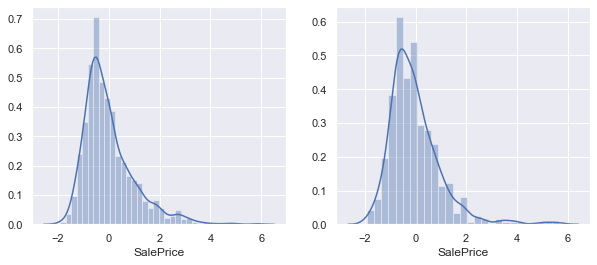

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [43]:
# Spliting the dependent and independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [44]:
len(X_train.columns)

170

### Using RFE lets try to to find the optimal number of features before applying GridSearchCV

In [45]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [46]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [47]:
# Lets filter the train and test set for the RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Lasso regression model

In [48]:
# Lets try first with the Lasso regression model
lm = Lasso(alpha=0.01)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)

y_test_pred  = lm.predict(X_test)

print('The R2 Score of the Lasso model on the train dataset is',r2_score(y_true=y_train,y_pred=y_train_pred))
print('The R2 Score of the Lasso model on the test dataset is',r2_score(y_true=y_test,y_pred=y_test_pred))

The R2 Score of the Lasso model on the train dataset is 0.8555393795625296
The R2 Score of the Lasso model on the test dataset is 0.811615915806343


In [49]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -0.879),
 ('LotFrontage', 0.056),
 ('LotArea', 0.35),
 ('LotShape', 0.267),
 ('LandSlope', 0.212),
 ('OverallQual', 0.397),
 ('OverallCond', -0.0),
 ('MasVnrArea', 0.143),
 ('ExterQual', -0.0),
 ('ExterCond', -0.0),
 ('BsmtQual', -0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', -0.0),
 ('CentralAir', -0.0),
 ('2ndFlrSF', 0.064),
 ('GrLivArea', -0.0),
 ('BsmtFullBath', -0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', -0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenQual', -0.0),
 ('Fireplaces', -0.0),
 ('GarageFinish', -0.0),
 ('GarageArea', -0.0),
 ('GarageQual', -0.0),
 ('GarageCond', -0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('ScreenPorch', -0.0),
 ('MoSold', -0.0),
 ('YearBuilt_Old', 0.0),
 ('YearRemodAdd_Old', 0.0),
 ('YrSold_Old', -0.023),
 ('MSZoning_FV', -0.0),
 

#### Improving the model with the optimal value of alpha using GridSearchCV

In [50]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    3.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.016635,0.004767,0.002706,0.002087,0.0001,{'alpha': 0.0001},0.879540,0.863828,0.808604,0.866889,...,0.900560,0.899237,0.897584,0.898964,0.896649,0.896511,0.895969,0.900337,0.898237,0.001543
1,0.007304,0.001900,0.002712,0.001942,0.0010,{'alpha': 0.001},0.882921,0.868849,0.862020,0.853237,...,0.889297,0.889856,0.889293,0.889915,0.887762,0.887617,0.885516,0.889265,0.888491,0.001302
2,0.005732,0.003304,0.002906,0.003060,0.0100,{'alpha': 0.01},0.855256,0.865639,0.856183,0.807387,...,0.856806,0.860611,0.854888,0.856759,0.854896,0.856051,0.852252,0.857831,0.855916,0.002162
3,0.004508,0.002846,0.002874,0.002846,0.0500,{'alpha': 0.05},0.832818,0.857981,0.834649,0.763947,...,0.820845,0.829933,0.823115,0.817552,0.821548,0.822777,0.818825,0.824898,0.822247,0.003289
4,0.004679,0.004022,0.004552,0.004893,0.1000,{'alpha': 0.1},0.821880,0.844549,0.798677,0.742391,...,0.790788,0.799071,0.793107,0.787196,0.791590,0.794979,0.788952,0.794278,0.792378,0.003268


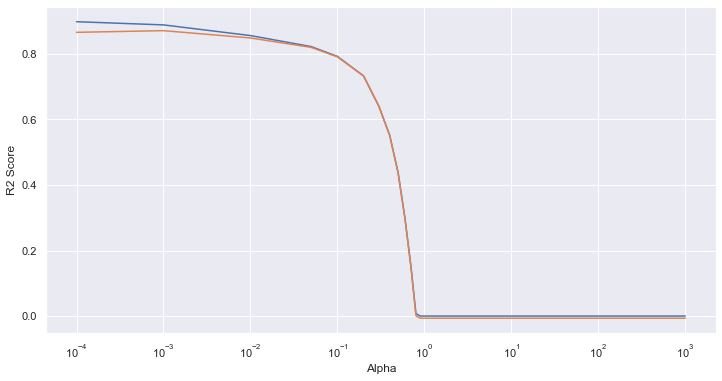

In [52]:
plt.figure(figsize=(12,6))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [53]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [54]:
lasso_opt = Lasso(alpha=0.001)
lasso_opt.fit(X_train,y_train)

y_train_pred = lasso_opt.predict(X_train)
y_test_pred = lasso_opt.predict(X_test)

print('The R2 Score of the Lasso model on the train dataset for optimum alpha is',r2_score(y_train, y_train_pred))
print('The R2 Score of the Lasso model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))

The R2 Score of the Lasso model on the train dataset for optimum alpha is 0.8874763828278645
The R2 Score of the Lasso model on the test dataset for optimum alpha is 0.8384834246392682


In [55]:
model_param = list(lasso_opt.coef_)
model_param.insert(0,lasso_opt.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_opt_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_opt_coef.columns = ['Featuere','Coef']

In [56]:
lasso_opt_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
26,HalfBath,0.452667
5,OverallQual,0.407371
68,Neighborhood_NridgHt,0.327528
2,LotArea,0.298118
21,2ndFlrSF,0.249647
58,Neighborhood_Crawfor,0.242762
3,LotShape,0.233999
4,LandSlope,0.192793
51,LotConfig_FR3,0.172513
1,LotFrontage,0.159077


###  Using Ridge Regression

In [57]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('The R2 Score of the Ridge model on the train dataset is',r2_score(y_train, y_train_pred))
print('The R2 Score of the Ridge model on the test dataset is',r2_score(y_test, y_test_pred))

The R2 Score of the Ridge model on the train dataset is 0.8972454930248686
The R2 Score of the Ridge model on the test dataset is 0.8202212088869265


#### Lets try to improve our model with the optimal value of alpha using GridSearchCV

In [58]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005490,0.007420,0.002220,0.005260,0.0001,{'alpha': 0.0001},0.879460,0.862745,0.795042,0.868149,...,0.900845,0.899511,0.897850,0.899231,0.896893,0.896772,0.896255,0.900653,0.898510,0.001553
1,0.004796,0.006901,0.002042,0.004951,0.0010,{'alpha': 0.001},0.879463,0.862753,0.795255,0.868149,...,0.900845,0.899511,0.897850,0.899231,0.896893,0.896772,0.896255,0.900653,0.898510,0.001553
2,0.004681,0.006860,0.000322,0.000965,0.0100,{'alpha': 0.01},0.879492,0.862835,0.797321,0.868144,...,0.900844,0.899511,0.897850,0.899231,0.896892,0.896771,0.896253,0.900651,0.898509,0.001553
3,0.008294,0.008312,0.000402,0.000669,0.0500,{'alpha': 0.05},0.879608,0.863184,0.805300,0.868108,...,0.900811,0.899496,0.897838,0.899218,0.896880,0.896759,0.896225,0.900624,0.898492,0.001549
4,0.002186,0.004594,0.000199,0.000598,0.1000,{'alpha': 0.1},0.879733,0.863592,0.813137,0.868034,...,0.900728,0.899456,0.897806,0.899182,0.896848,0.896727,0.896153,0.900555,0.898444,0.001542


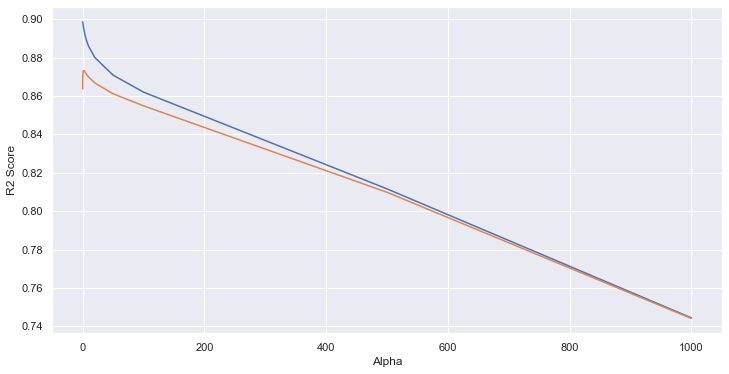

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph lets create the model

In [61]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 2.0}

In [62]:
ridge_opt = Ridge(alpha = 2.0)
ridge_opt.fit(X_train,y_train)

y_pred_train = ridge_opt.predict(X_train)

y_pred_test = ridge_opt.predict(X_test)

print('The R2 Score of the Ridge model on the train dataset for optimum alpha is',r2_score(y_train, y_train_pred))
print('The R2 Score of the Ridge model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))

The R2 Score of the Ridge model on the train dataset for optimum alpha is 0.8972454930248686
The R2 Score of the Ridge model on the test dataset for optimum alpha is 0.8202212088869265


In [63]:
model_parameter = list(ridge_opt.coef_)
model_parameter.insert(0,ridge_opt.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_opt_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_opt_coef.columns = ['Feaure','Coef']

In [64]:
ridge_opt_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
26,HalfBath,0.420144
5,OverallQual,0.404557
58,Neighborhood_Crawfor,0.383944
68,Neighborhood_NridgHt,0.369682
2,LotArea,0.290334
21,2ndFlrSF,0.224136
3,LotShape,0.217125
7,MasVnrArea,0.212137
46,LandContour_HLS,0.201201
52,LotConfig_Inside,0.197170


#### Conclusion:
After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elimination hence we are going to consider that as my final model.

#### Final Model

In [65]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('The R2 Score of the Lasso model on the train dataset for optimum alpha is', r2_score(y_true=y_train,y_pred=y_train_pred))
print('The R2 Score of the Lasso model on the test dataset for optimum alpha is', r2_score(y_true=y_test,y_pred=y_test_pred))

The R2 Score of the Lasso model on the train dataset for optimum alpha is 0.8874763828278645
The R2 Score of the Lasso model on the test dataset for optimum alpha is 0.8384834246392682


##### After compairing both the model we can see that the below Features are best explaining the DataSet

* HalfBath with coefficient 0.452667
* OverallQual with coefficient 0.407371
* Neighborhood_NridgHt with coefficient 0.327528
* LotArea with coefficient 0.298118
* 2ndFlrSF with coefficient	0.249647

#### The Optimal value of alpha for ridge is 2 and for lasso it is 0.001.

### Subjective Questions - Demonstration/Validation

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [66]:
ridge2 = Ridge(alpha=4.0)
ridge2.fit(X_train,y_train)

y_train_pred = ridge2.predict(X_train)
y_test_pred = ridge2.predict(X_test)

print('The R2 Score of the Ridge model on the train dataset is',r2_score(y_train, y_train_pred))
print('The R2 Score of the Ridge model on the test dataset is',r2_score(y_test, y_test_pred))

The R2 Score of the Ridge model on the train dataset is 0.8911593737600229
The R2 Score of the Ridge model on the test dataset is 0.8370513708826365


In [67]:
model_parameter = list(ridge2.coef_)
model_parameter.insert(0,ridge2.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge2_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge2_coef.columns = ['Feaure','Coef']
ridge2_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
5,OverallQual,0.403619
26,HalfBath,0.375168
58,Neighborhood_Crawfor,0.318587
2,LotArea,0.295469
68,Neighborhood_NridgHt,0.285271
21,2ndFlrSF,0.223859
3,LotShape,0.223585
4,LandSlope,0.192710
7,MasVnrArea,0.189509
51,LotConfig_FR3,0.183385


In [68]:
lasso2 = Lasso(alpha=0.002)
lasso2.fit(X_train,y_train)

y_train_pred = lasso2.predict(X_train)
y_test_pred = lasso2.predict(X_test)

print('The R2 Score of the Lasso model on the train dataset for optimum alpha is', r2_score(y_true=y_train,y_pred=y_train_pred))
print('The R2 Score of the Lasso model on the test dataset for optimum alpha is', r2_score(y_true=y_test,y_pred=y_test_pred))

The R2 Score of the Lasso model on the train dataset for optimum alpha is 0.8810391401445362
The R2 Score of the Lasso model on the test dataset for optimum alpha is 0.8356218131279747


In [69]:
model_param = list(lasso2.coef_)
model_param.insert(0,lasso2.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso2_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso2_coef.columns = ['Featuere','Coef']
lasso2_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
5,OverallQual,0.407322
26,HalfBath,0.379411
68,Neighborhood_NridgHt,0.337685
2,LotArea,0.305520
3,LotShape,0.250106
21,2ndFlrSF,0.245462
58,Neighborhood_Crawfor,0.219146
4,LandSlope,0.194935
1,LotFrontage,0.166329
7,MasVnrArea,0.143343


* Doubling alpha value does not have any significant impact on R2 score of both the models. 
* However the most important predictor variables changes from HalfBath to OverallQual